# Data Preprocessing and Analysis
For clear understanding all steps are added as new column , but for final version it be removed and only required coulmns will be selected

In [38]:
# Importing Libraries
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', 100)

In [2]:
# Reading preprocessed data from last step
sst_Data = pd.read_csv('sst_dataset_merged.csv')

# Take a look at the data
sst_Data.head()

Unnamed: 0  sentence_index  \
0           0               1   
1           1               2   
2           2               3   
3           3               4   
4           4               5   

                                                                                              sentence  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

                                                                                                phrase  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

   phrase_ids  splitset_label  sentiment_values  
0      226166               1                 3  
1      226300               1                 4  
2       13995               2                 2  
3       14123               2                 3  
4       13999               2                 4

## Assigning Negative,Positive and Neutral label 

In [3]:
#Reassigning labels

def reassign_labels_text(sst_Data):
    """Reassigns the labels for the sentiment values."""
    sst_Data["sentiment_text"] = sst_Data["sentiment_values"].apply(lambda x: "negative" if x <= 1 else "neutral" if x == 2 else "positive")
    return sst_Data

sst_Data = reassign_labels_text(sst_Data)
sst_Data.head()


Unnamed: 0  sentence_index  \
0           0               1   
1           1               2   
2           2               3   
3           3               4   
4           4               5   

                                                                                              sentence  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

                                                                                                phrase  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

   phrase_ids  splitset_label  sentiment_values sentiment_text  
0      226166               1                 3       positive  
1      226300               1                 4       positive  
2       13995               2                 2        neutral  
3       14123               2                 3       positive  
4       13999               2                 4       positive

In [4]:
#Reassigning labels as 0 for negative, 1 for neutral and 2 for positive

def reassign_labels(sst_Data):
    """Reassigns the labels for the sentiment values."""
    sst_Data["sentiment_Value"] = sst_Data["sentiment_values"].apply(lambda x: 0 if x <= 1 else 1 if x == 2 else 2)
    return sst_Data

sst_Data = reassign_labels(sst_Data)
sst_Data.head()

Unnamed: 0  sentence_index  \
0           0               1   
1           1               2   
2           2               3   
3           3               4   
4           4               5   

                                                                                              sentence  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

                                                                                                phrase  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

   phrase_ids  splitset_label  sentiment_values sentiment_text  \
0      226166               1                 3       positive   
1      226300               1                 4       positive   
2       13995               2                 2        neutral   
3       14123               2                 3       positive   
4       13999               2                 4       positive   

   sentiment_Value  
0                2  
1                2  
2                1  
3                2  
4                2

## Data Preprocessing

### Converting sentences to lower Case

In [40]:
sst_Data['sentence']=sst_Data['sentence'].str.lower()
sst_Data.head()

Unnamed: 0  sentence_index  \
0           0               1   
1           1               2   
2           2               3   
3           3               4   
4           4               5   

                                                                                              sentence  \
0  the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a sp...   
1  the gorgeously elaborate continuation of `` the lord of the rings '' trilogy is so huge that a c...   
2                                                                       effective but too-tepid biopic   
3            if you sometimes like to go to the movies to have fun , wasabi is a good place to start .   
4  emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

                                                                                                phrase  \
0  The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a sp...   
1  The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a c...   
2                                                                       Effective but too-tepid biopic   
3            If you sometimes like to go to the movies to have fun , Wasabi is a good place to start .   
4  Emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

   phrase_ids  splitset_label  sentiment_values sentiment_text  \
0      226166               1                 3       positive   
1      226300               1                 4       positive   
2       13995               2                 2        neutral   
3       14123               2                 3       positive   
4       13999               2                 4       positive   

   sentiment_Value  
0                2  
1                2  
2                1  
3                2  
4                2

### Selecting Specified columns

In [47]:
def select_columns(df):
    """Selects the specified columns from the DataFrame."""
    return df[["Unnamed: 0","splitset_label", "sentence", "sentiment_text","sentiment_Value"]]
sst_Data = select_columns(sst_Data)

sst_Data.head()

Unnamed: 0  splitset_label  \
0           0               1   
1           1               1   
2           2               2   
3           3               2   
4           4               2   

                                                                                              sentence  \
0  the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a sp...   
1  the gorgeously elaborate continuation of `` the lord of the rings '' trilogy is so huge that a c...   
2                                                                       effective but too-tepid biopic   
3            if you sometimes like to go to the movies to have fun , wasabi is a good place to start .   
4  emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

  sentiment_text  sentiment_Value  
0       positive                2  
1       positive                2  
2        neutral                1  
3       positive                2  
4       positive                2

### Renaming columns

In [48]:
def rename_columns(df):
    """Renames the specified columns in the DataFrame."""
    df.rename(columns={"Unnamed: 0": "index_id","sentence": "reviews", "sentiment_text": "label","sentiment_Value": "label_Value"}, inplace=True)
    return df
sst_Data = rename_columns(sst_Data)
sst_Data.head()

index_id  splitset_label  \
0         0               1   
1         1               1   
2         2               2   
3         3               2   
4         4               2   

                                                                                               reviews  \
0  the rock is destined to be the 21st century 's new `` conan '' and that he 's going to make a sp...   
1  the gorgeously elaborate continuation of `` the lord of the rings '' trilogy is so huge that a c...   
2                                                                       effective but too-tepid biopic   
3            if you sometimes like to go to the movies to have fun , wasabi is a good place to start .   
4  emerges as something rare , an issue movie that 's so honest and keenly observed that it does n'...   

      label  label_Value  
0  positive            2  
1  positive            2  
2   neutral            1  
3  positive            2  
4  positive            2

### Applying Contractions

In [50]:
import re
import contractions

def expand_contractions(text):
    """Expands contractions in text."""
    return contractions.fix(text)

def clean_text_column(sst_Data1):
    """Cleans the text column in the dataframe."""
    sst_Data1["reviews"] = sst_Data1["reviews"].apply(expand_contractions)
    return sst_Data1

sst_contracted = clean_text_column(sst_Data)
#sst_contracted.head()

### Removing Punctuations and other special Characters

In [18]:
def remove_punctuation(text):
    """Removes punctuation marks and other special characters from text."""
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)

def clean_text_column(df):
    """Cleans the text column in the dataframe."""
    df["reviews"] = df["reviews"].apply(remove_punctuation)
    return df

sst_Data_clean = clean_text_column(sst_contracted)
sst_Data_clean.head()

index_id  splitset_label  \
0         0               1   
1         1               1   
2         2               2   
3         3               2   
4         4               2   

                                                                                               reviews  \
0  the rock is destined to be the 21st century s new  conan  and that he s going to make a splash e...   
1  the gorgeously elaborate continuation of  the lord of the rings  trilogy is so huge that a colum...   
2                                                                        effective but tootepid biopic   
3              if you sometimes like to go to the movies to have fun  wasabi is a good place to start    
4  emerges as something rare  an issue movie that s so honest and keenly observed that it does nt f...   

      label  label_Value  
0  positive            2  
1  positive            2  
2   neutral            1  
3  positive            2  
4  positive            2

In [19]:
#Splitting train, val and test data 

def split_data(df, splitset_value):
    """Splits the data into train, val, and test sets based on the splitset value."""
    train = df[df["splitset_label"] == 1]
    test = df[df["splitset_label"] == 2]
    dev = df[df["splitset_label"] == 3]
    return train, test, dev

train, test, dev= split_data(sst_Data_clean, splitset_value=1)


In [28]:

def select_columns(df):
    """Selects the specified columns from the DataFrame."""
    return df[["reviews", "label","label_Value"]]
sst_train = select_columns(train)
sst_test = select_columns(test)
sst_dev = select_columns(dev)
sst_train.head()


reviews  \
0   the rock is destined to be the 21st century s new  conan  and that he s going to make a splash e...   
1   the gorgeously elaborate continuation of  the lord of the rings  trilogy is so huge that a colum...   
60  singercomposer bryan adams contributes a slew of songs  a few potential hits  a few more simply ...   
61  you  would think by now america would have had enough of plucky british eccentrics with hearts o...   
62                                                                  yet the act is still charming here    

       label  label_Value  
0   positive            2  
1   positive            2  
60  positive            2  
61   neutral            1  
62  positive            2

## Distribution of Positive, negative and neutral Comments

C:\Users\EL156AR\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


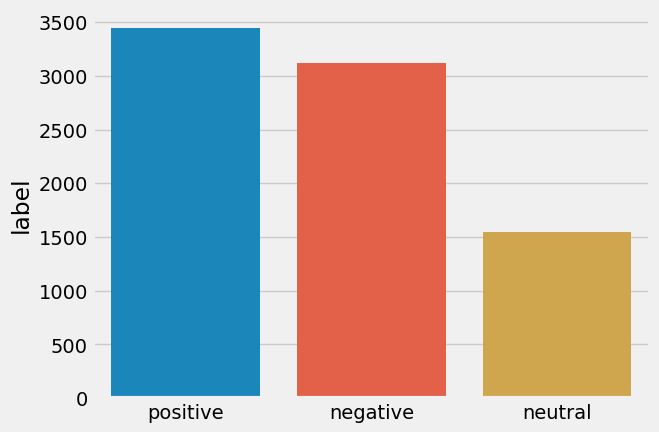

In [36]:
"""Distribution of target variable"""
temp = sst_train["label"].value_counts()
sns.barplot(temp.index, temp)
plt.show()

### Length analysis of Positive and Negative Sentiment

In [ ]:
'''Plot sentence lenghth'''
fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(20, 8), dpi=100)
num=sst_train[sst_train["label"]=='positive']['reviews'].str.split().map(lambda x: len(x))
ax1.hist(num,bins = 40,color='orangered')
ax1.set_title('Positive')
ax1.set_xlabel('Lenght of reviews')
num=sst_train[sst_train["label"]=='negative']['reviews'].str.split().map(lambda x: len(x))
ax2.hist(num,bins = 40)
ax2.set_title('Negative')
ax2.set_xlabel('Lenght of reviews')
ax1.set_ylabel('Lenght of reviews')
plt.show()

### Saving train, test and Val data to folder

In [12]:
df = pd.DataFrame(sst_train)

df.to_csv(r"C:\Users\EL156AR\Downloads\stanfordSentimentTreebank\stanfordSentimentTreebank\SST_Train_Data.csv", index = False, header=True)

In [13]:
df = pd.DataFrame(sst_test)

df.to_csv(r"C:\Users\EL156AR\Downloads\stanfordSentimentTreebank\stanfordSentimentTreebank\SST_Test_Data.csv", index = False, header=True)

In [14]:
df = pd.DataFrame(sst_dev)

df.to_csv(r"C:\Users\EL156AR\Downloads\stanfordSentimentTreebank\stanfordSentimentTreebank\SST_Dev_Data.csv", index = False, header=True)